In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [3]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal
from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [4]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [5]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
print(type(correlation_threshold_min_value))
print(furnace_signal_column_a)

<class 'float'>
DEWIHOAT9_I0


In [6]:
initial_dataframe = create_dataframe(filepath_server)

In [ ]:
initial_dataframe.head()

In [ ]:
u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

In [ ]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


In [ ]:
test_new.tail()

In [ ]:
# test_new_alter = test_new.loc[::-1]
# print(test_new_alter.shape)
# test_new_alter.head()

In [ ]:
# plt.plot(test_new_alter[target_column], color = 'blue')
# plt.plot(test_new_alter[furnace_signal_column], color = 'red')
# plt.legend([target_column, furnace_signal_column], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

In [21]:
test_new.shape

(186100, 4239)

In [8]:
# test_new_1 = test_new.drop(['row ID'], axis = 1)

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])

In [9]:
multivariate_data.shape

(186100, 3983)

In [10]:
multivariate_data.head()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,dateTime
186099,72.030143,28.019753,90.988125,25.369044,92.387543,90.208292,93.674403,10.971169,51.916376,100.000000,...,94.822678,56.662746,0.0,59.076656,63.49364,45.589686,30.354219,0,72.592791,2019-02-11 21:57:00
186098,72.030143,37.870419,90.988125,34.451579,88.177774,90.449495,93.353135,18.897334,51.451800,75.601790,...,94.806487,56.662746,0.0,59.186438,63.49364,45.589686,30.333882,0,72.108628,2019-02-11 21:58:00
186097,72.030143,37.539252,91.149431,28.288056,83.217843,90.611060,93.694815,21.669213,51.451800,88.131190,...,94.804366,56.662746,0.0,59.348841,63.49364,45.589686,30.896460,0,71.980585,2019-02-11 21:59:00
186096,72.491504,33.654575,91.149431,19.484082,78.546713,90.590588,93.353135,20.455251,50.987224,91.157527,...,94.866030,56.943046,0.0,58.551446,63.49364,45.589686,30.998142,0,72.105027,2019-02-11 22:00:00
186095,72.952865,31.004058,91.149431,13.651564,74.451979,90.993356,93.373546,16.226620,50.987224,100.000000,...,94.857934,56.943046,0.0,58.921563,63.49364,45.589686,30.770411,0,72.084620,2019-02-11 22:01:00


In [11]:
multivariate_data.tail()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,dateTime
4,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.629849,63.149452,42.009703,57.167141,70.572657,72.358673,25.090725,0,4.817258,2019-08-15 09:06:00
3,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,42.389817,57.236065,70.572657,72.472953,24.828106,0,4.822540,2019-08-15 09:07:00
2,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,0,4.821300,2019-08-15 09:08:00
1,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,0,4.821300,2019-08-15 09:09:00
0,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,0,4.826622,2019-08-15 09:10:00


In [12]:
multivariate_data_1 = multivariate_data.loc[::-1]

In [13]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data_1,req_column_name,index_array)

In [14]:
rearranged_dataframe.head()

,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,AEWIHO_T9AV2
0,2019-08-15 09:10:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,0,4.826622,74.720623
1,2019-08-15 09:09:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,0,4.821300,74.837410
2,2019-08-15 09:08:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,0,4.821300,75.169542
3,2019-08-15 09:07:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,42.389817,57.236065,70.572657,72.472953,24.828106,0,4.822540,75.608264
4,2019-08-15 09:06:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.629849,63.149452,42.009703,57.167141,70.572657,72.358673,25.090725,0,4.817258,75.514649


In [ ]:
# count =0
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
#     if v>=98 or rearranged_dataframe.iloc[i][furnace_signal_column_b]>99:
#         count +=1
        
# print(count)

In [ ]:
# for x,r in enumerate(rearranged_dataframe[furnace_signal_column_b]):
#     if r!=100:
#         print(x,'\t',r)

In [ ]:
# increase=0
# count_array_1 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
#     if v<98 and rearranged_dataframe.iloc[i][furnace_signal_column_b]<100:
#         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_1 = np.append(count_array_1, i)
#         increase+=1

In [42]:
increase_1=0
count_array_2 = []
for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
    if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
#         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
        count_array_2 = np.append(count_array_2, i)
        increase_1+=1

In [43]:
print(increase_1)
print(count_array_2.shape)

44644
(44644,)


In [11]:
# count_3=0
# count_array_3 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
#     if v != 98.36065573770493 and rearranged_dataframe.iloc[i][furnace_signal_column_b] != 100:
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_3 = np.append(count_array_3, i)
#         count_3+=1

In [27]:
count_3
count_array_3.shape

(44645,)

In [44]:
if count_array_2.size > 0:
    dataframe_drop = rearranged_dataframe.drop(count_array_2, axis=0)  # axis= 0 means row indiated. 1 means column indicated
else:
    dataframe_drop = rearranged_dataframe

In [33]:
rearranged_dataframe.head()

,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,AEWIHO_T9AV2
186099,2019-02-11 21:57:00,28.019753,90.988125,25.369044,92.387543,90.208292,93.674403,10.971169,51.916376,100.000000,...,94.822678,56.662746,0.0,59.076656,63.49364,45.589686,30.354219,0,72.592791,66.387058
186098,2019-02-11 21:58:00,37.870419,90.988125,34.451579,88.177774,90.449495,93.353135,18.897334,51.451800,75.601790,...,94.806487,56.662746,0.0,59.186438,63.49364,45.589686,30.333882,0,72.108628,66.765225
186097,2019-02-11 21:59:00,37.539252,91.149431,28.288056,83.217843,90.611060,93.694815,21.669213,51.451800,88.131190,...,94.804366,56.662746,0.0,59.348841,63.49364,45.589686,30.896460,0,71.980585,66.767387
186096,2019-02-11 22:00:00,33.654575,91.149431,19.484082,78.546713,90.590588,93.353135,20.455251,50.987224,91.157527,...,94.866030,56.943046,0.0,58.551446,63.49364,45.589686,30.998142,0,72.105027,66.859457
186095,2019-02-11 22:01:00,31.004058,91.149431,13.651564,74.451979,90.993356,93.373546,16.226620,50.987224,100.000000,...,94.857934,56.943046,0.0,58.921563,63.49364,45.589686,30.770411,0,72.084620,66.869962


In [30]:
#rearranged_dataframe.shape
dataframe_drop1=dataframe_drop.reset_index()
dataframe_drop1.head()

,index,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,AEWIHO_T9AV2
0,186099,2019-02-11 21:57:00,28.019753,90.988125,25.369044,92.387543,90.208292,93.674403,10.971169,51.916376,...,94.822678,56.662746,0.0,59.076656,63.49364,45.589686,30.354219,0,72.592791,66.387058
1,186098,2019-02-11 21:58:00,37.870419,90.988125,34.451579,88.177774,90.449495,93.353135,18.897334,51.451800,...,94.806487,56.662746,0.0,59.186438,63.49364,45.589686,30.333882,0,72.108628,66.765225
2,186097,2019-02-11 21:59:00,37.539252,91.149431,28.288056,83.217843,90.611060,93.694815,21.669213,51.451800,...,94.804366,56.662746,0.0,59.348841,63.49364,45.589686,30.896460,0,71.980585,66.767387
3,186096,2019-02-11 22:00:00,33.654575,91.149431,19.484082,78.546713,90.590588,93.353135,20.455251,50.987224,...,94.866030,56.943046,0.0,58.551446,63.49364,45.589686,30.998142,0,72.105027,66.859457
4,186095,2019-02-11 22:01:00,31.004058,91.149431,13.651564,74.451979,90.993356,93.373546,16.226620,50.987224,...,94.857934,56.943046,0.0,58.921563,63.49364,45.589686,30.770411,0,72.084620,66.869962


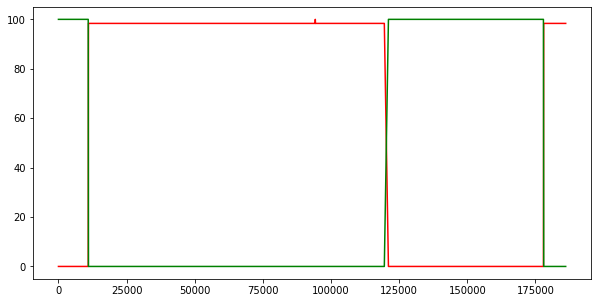

In [45]:
    # plt.plot(dataframe_2[target_column], color = 'blue')
plt.plot(dataframe_drop[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_drop[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [15]:
# dataframe_drop.iloc[174999][furnace_signal_column_a]
req_data=rearranged_dataframe.loc[(rearranged_dataframe[furnace_signal_column_a]>=98) | (rearranged_dataframe[furnace_signal_column_b]>=100)].values
req_frame=pd.DataFrame(req_data,columns=rearranged_dataframe.columns)

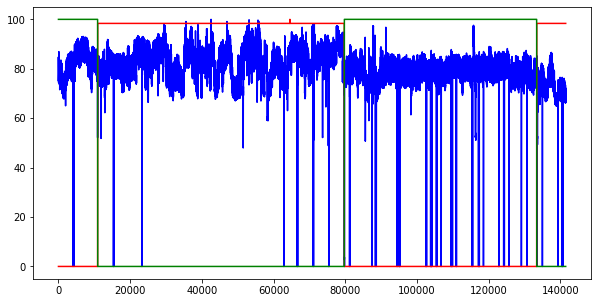

In [18]:
plt.plot(req_frame[target_column], color = 'blue')
plt.plot(req_frame[furnace_signal_column_a], color = 'red')
plt.plot(req_frame[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [19]:
req_data_1=req_frame.loc[(req_frame[target_column]!=0)].values
req_frame_1=pd.DataFrame(req_data_1,columns=req_frame.columns)

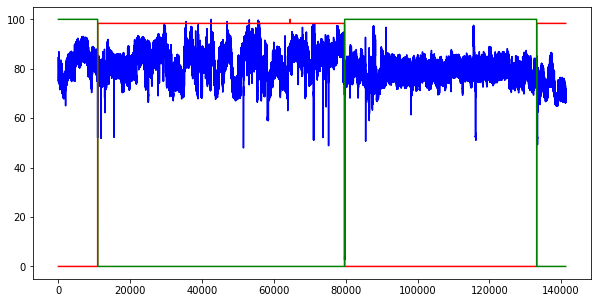

In [20]:
plt.plot(req_frame_1[target_column], color = 'blue')
plt.plot(req_frame_1[furnace_signal_column_a], color = 'red')
plt.plot(req_frame_1[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [21]:
print(rearranged_dataframe.shape)
print(req_frame.shape)
print(req_frame_1.shape)

(186100, 3983)
(141456, 3983)
(141269, 3983)


In [ ]:
# Checking signal for blast furnace B for turbine 9. If the value is 100 keep the ROW except drop
dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(rearranged_dataframe,furnace_signal_column)

In [ ]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)

In [ ]:
# # Checking target column's value. If ZERO drop the row.
# #target_signal = 'AEWIHO_T9AV2'
# # dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_no_zero_value_blast_furnace, target_column)

In [ ]:
def remove_zero(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] != val).all(axis=1)]
    return df

dataframe_no_zero_value_target_column = remove_zero(dataframe_no_zero_value_blast_furnace, target_column,0)

In [ ]:
print(dataframe_no_zero_value_target_column.shape)

In [22]:
dataframe_no_zero_value_target_column = req_frame_1

In [23]:
# Drop the column which has sam evalue in every ROW
dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [24]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_drop_column_with_same_value)


In [ ]:
# Drop the row who has consecutive same value
dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [25]:
dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [26]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

In [27]:
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)

(141269, 3983)
(141269, 3983)
(141269, 3983)
(141269, 1)


In [ ]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')


# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)


In [ ]:
dataframe_high_correlation.shape

In [ ]:
dataframe_datetime.tail()

In [ ]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation[0:5000])

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

In [ ]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

In [ ]:
# df = dataframe_date_time_type(dataframe_datetime)
df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, furnace_signal_column,final_directory, subfolder_name = 'date_fig_blast_furnace')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, furnace_signal_column,final_directory, subfolder_name = 'week_fig_blast_furnace')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, furnace_signal_column,final_directory, subfolder_name = 'day_fig_blast_furnace')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [ ]:
predicted_output = NN_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)